In [2]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
# Cargamos el archivo usando la ruta que vimos en tus fotos
ruta = '../data/viviendas.csv'
df = pd.read_csv(ruta)

# Conversión de área (Pies a Metros)
df['area_m2'] = df['area'] * 0.092903

# Convertimos 'airconditioning' a números (1 y 0) para que la IA lo entienda
df['airconditioning_num'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)

print(" Datos cargados y convertidos con éxito.")
df[['price', 'area_m2', 'airconditioning_num']].head()

 Datos cargados y convertidos con éxito.


,price,area_m2,airconditioning_num
0,13300000,689.34026,1
1,12250000,832.41088,1
2,12250000,925.31388,0
3,12215000,696.77250,1
4,11410000,689.34026,1


In [4]:
# 1. Puntuación de servicios (Aire + Parqueadero)
df['servicios_total'] = df['airconditioning_num'] + df['parking']

# 2. Amplitud (Espacio por cada habitación)
df['amplitud_habitacion'] = df['area_m2'] / df['bedrooms']

# 3. Indicador de Lujo (Más de 1 baño y con Aire)
df['es_premium'] = ((df['bathrooms'] > 1) & (df['airconditioning_num'] == 1)).astype(int)

print("Variables de ingeniería creadas.")

Variables de ingeniería creadas.


In [5]:
# Seleccionamos las columnas definitivas
columnas_x = ['area_m2', 'bedrooms', 'bathrooms', 'parking', 'servicios_total', 'amplitud_habitacion', 'es_premium']
X = df[columnas_x]
y = df['price']

# Dividimos 80% para entrenar y 20% para evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print(" Modelo entrenado.")

 Modelo entrenado.


In [6]:
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Precisión R²: {r2 * 100:.2f}%")
print(f"Error promedio: ${mae:,.2f}")

Precisión R²: 56.17%
Error promedio: $1,133,262.05


In [7]:
# Subimos un nivel para crear la carpeta 'models' en la raíz del proyecto
if not os.path.exists('../models'):
    os.makedirs('../models')

joblib.dump(modelo, '../models/modelo_vivienda_v2.pkl')
print("Modelo guardado como 'modelo_vivienda_v2.pkl' en la carpeta models.")

Modelo guardado como 'modelo_vivienda_v2.pkl' en la carpeta models.


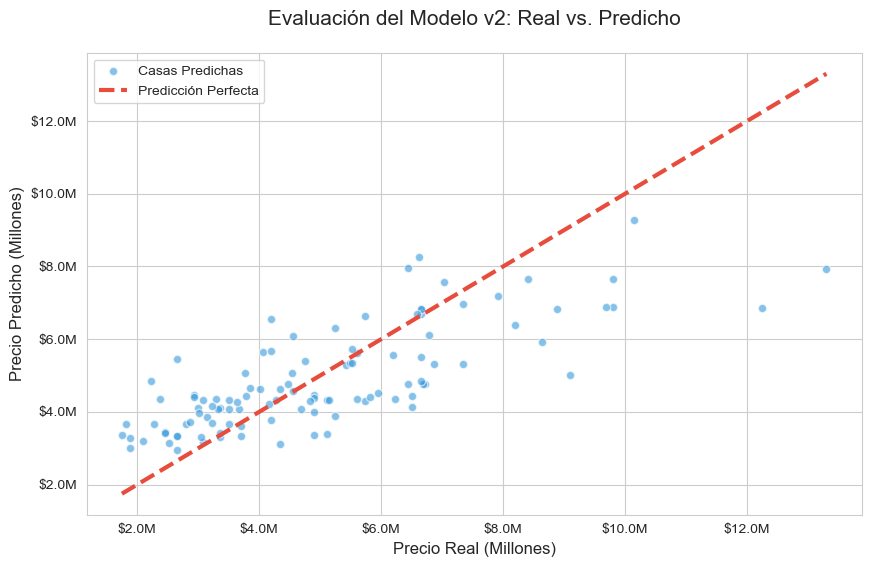

Gráfico profesional guardado sin notación científica.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Configurar el estilo
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# 2. Crear el gráfico de dispersión
plt.scatter(y_test, y_pred, color='#3498db', alpha=0.6, edgecolors='w', label='Casas Predichas')

# 3. Dibujar la línea ideal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='#e74c3c', lw=3, linestyle='--', label='Predicción Perfecta')

# --- 4. TRUCO PARA ELIMINAR NOTACIÓN CIENTÍFICA ---
def millones(x, pos):
    return f'${x/1e6:.1f}M'

formatter = ticker.FuncFormatter(millones)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
# --------------------------------------------------

# 5. Personalización
plt.title('Evaluación del Modelo v2: Real vs. Predicho', fontsize=15, pad=20)
plt.xlabel('Precio Real (Millones)', fontsize=12)
plt.ylabel('Precio Predicho (Millones)', fontsize=12)
plt.legend()

# 6. GUARDAR
if not os.path.exists('../img'):
    os.makedirs('../img')

plt.savefig('../img/resultados_modelo_v2.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico profesional guardado sin notación científica.")